# Portuguese Financial Services

## Importing the Basic Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset in  Pandas DataFrame

In [2]:
data = pd.read_csv("TermDeposit.csv")

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Performing EDA

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [8]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [9]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Understanding Data Distribution for each column

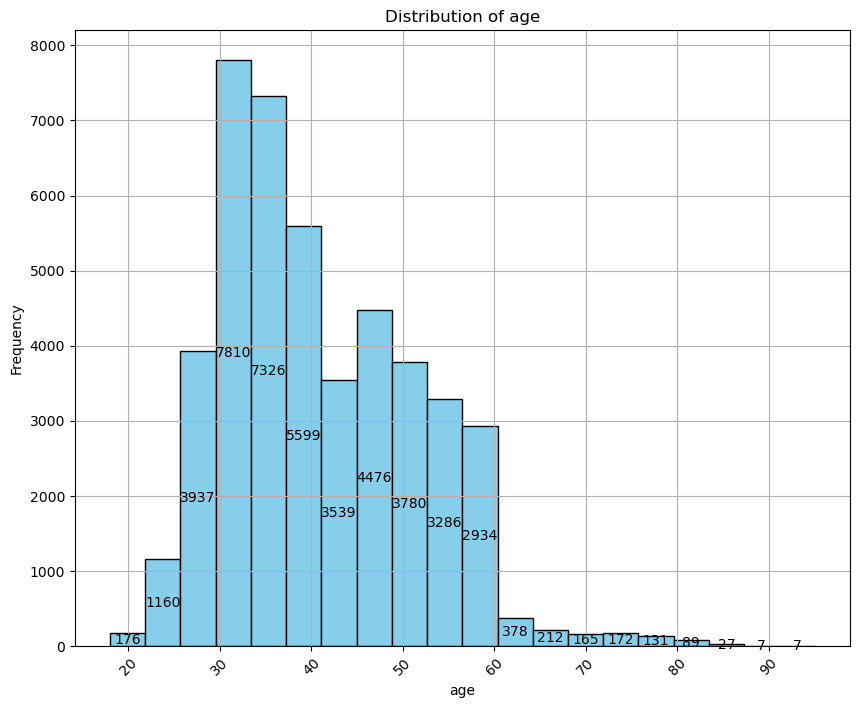

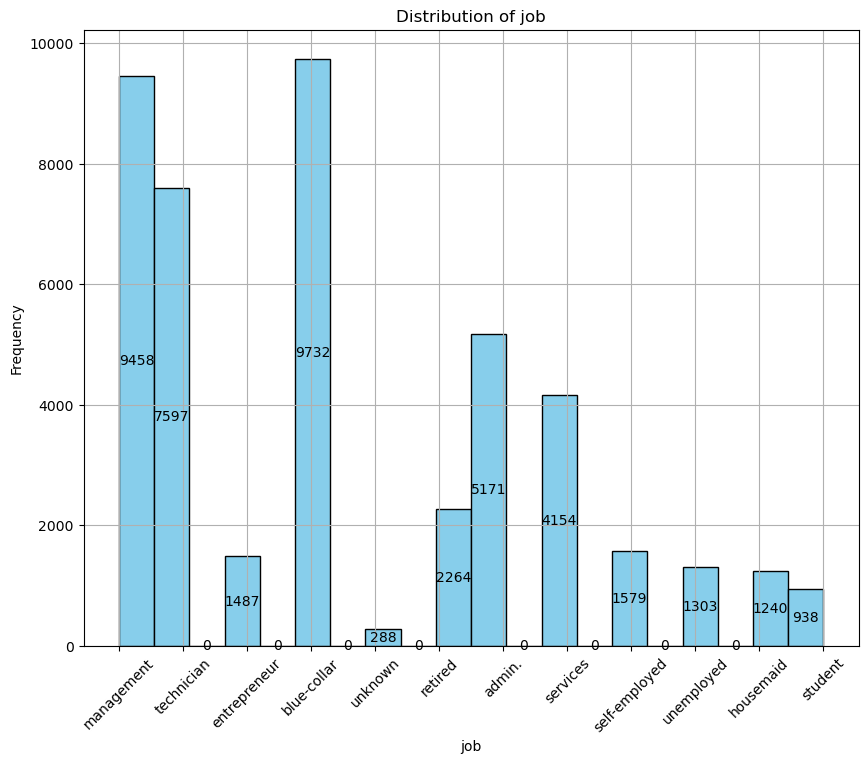

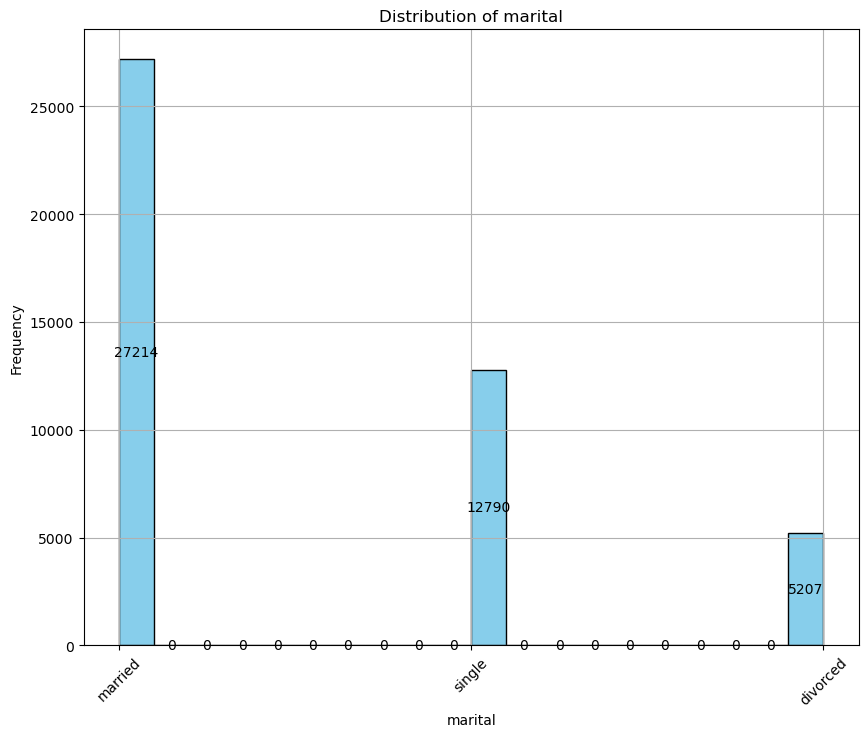

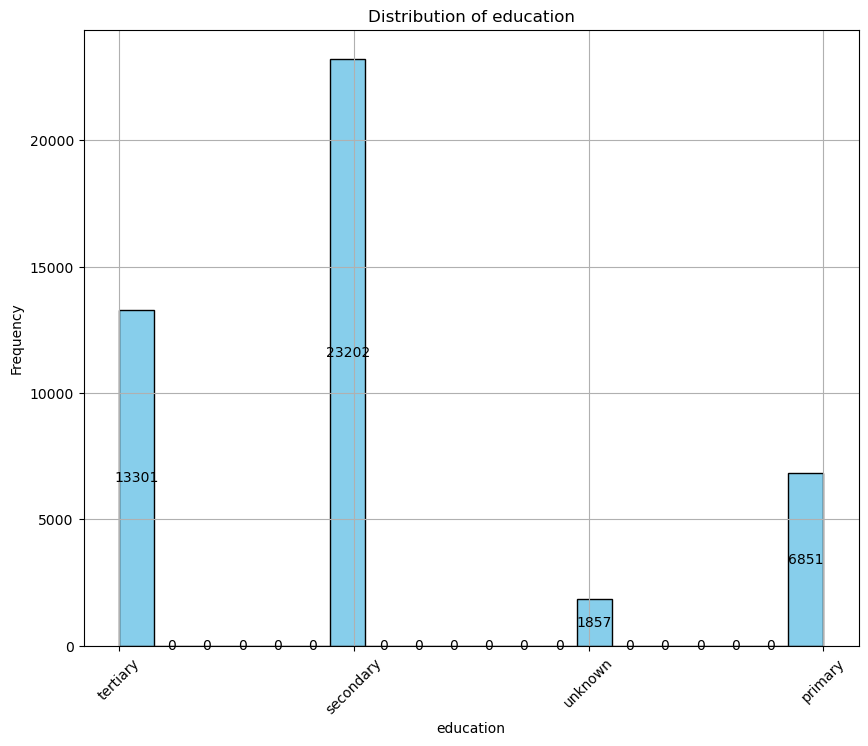

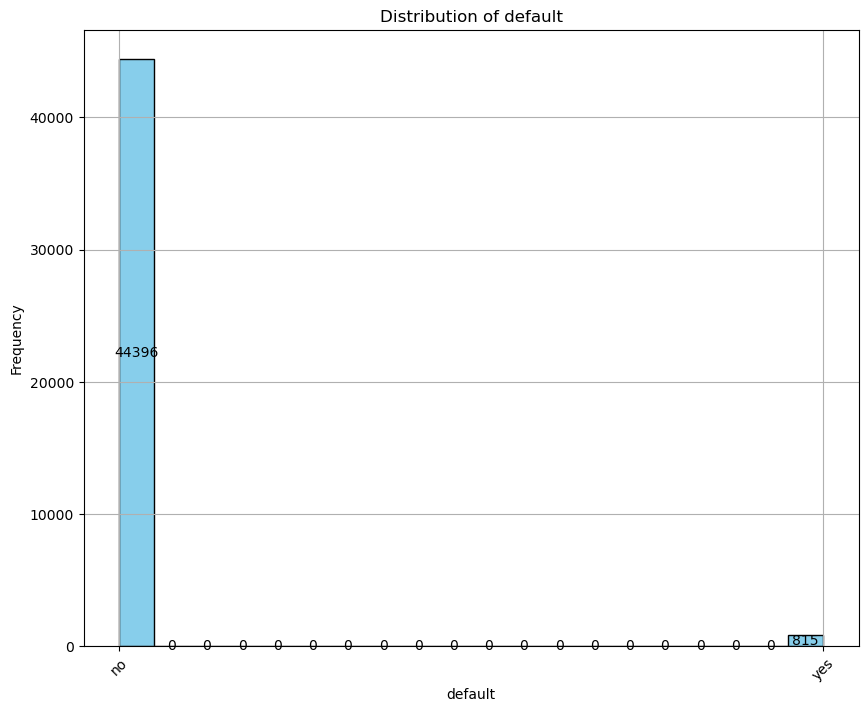

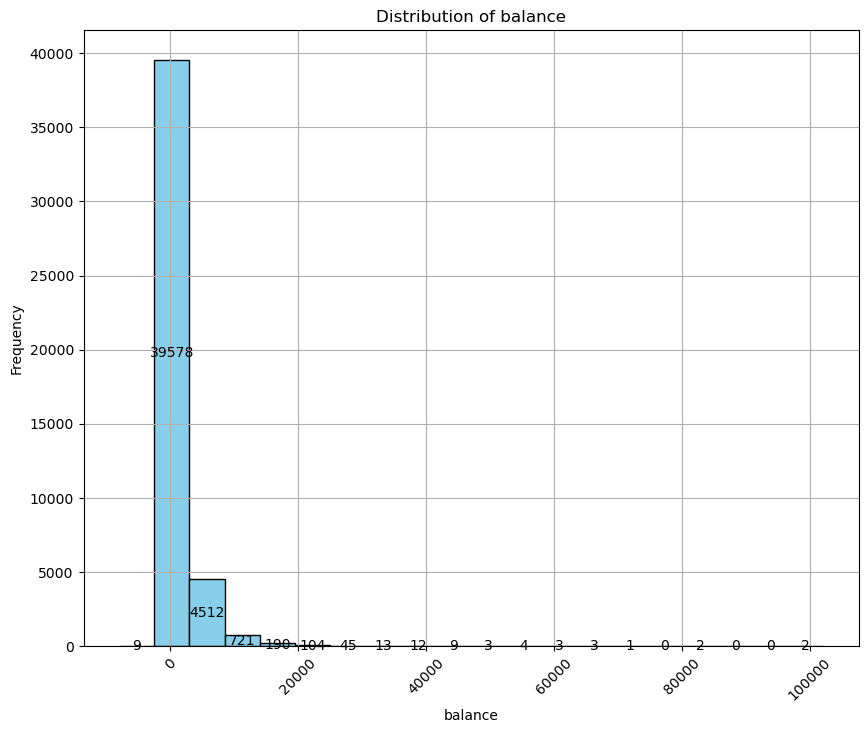

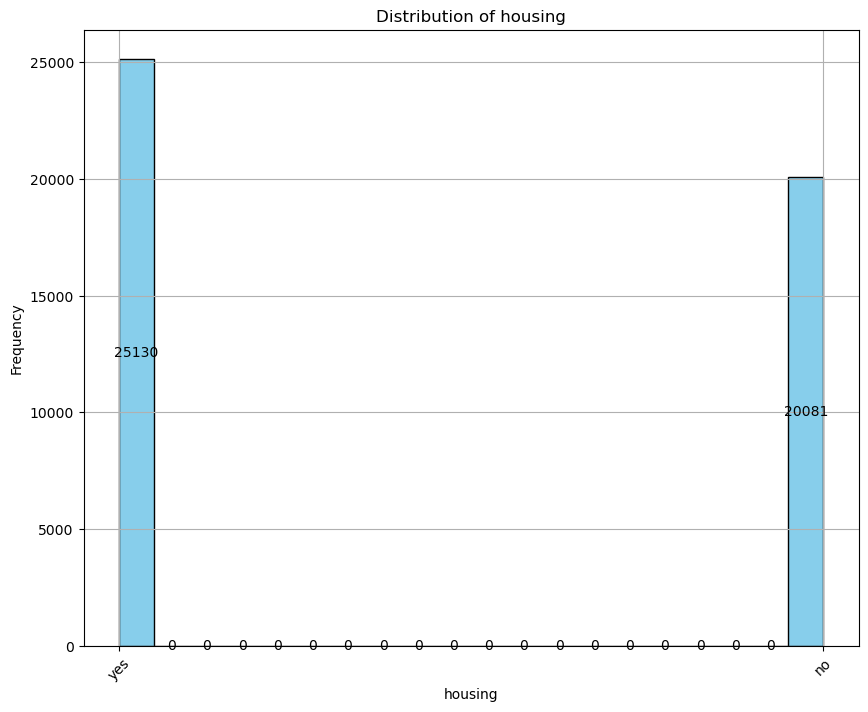

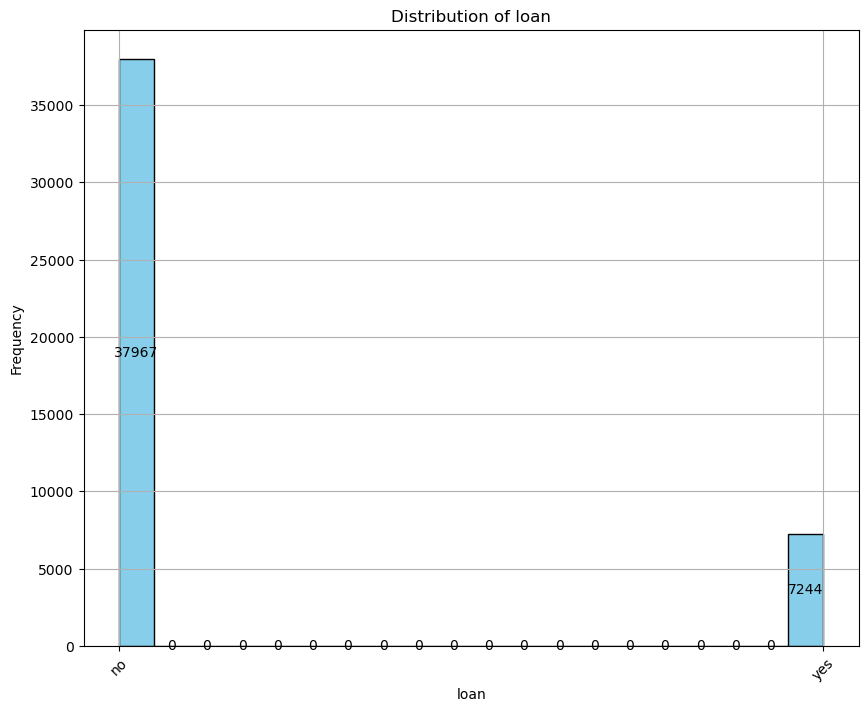

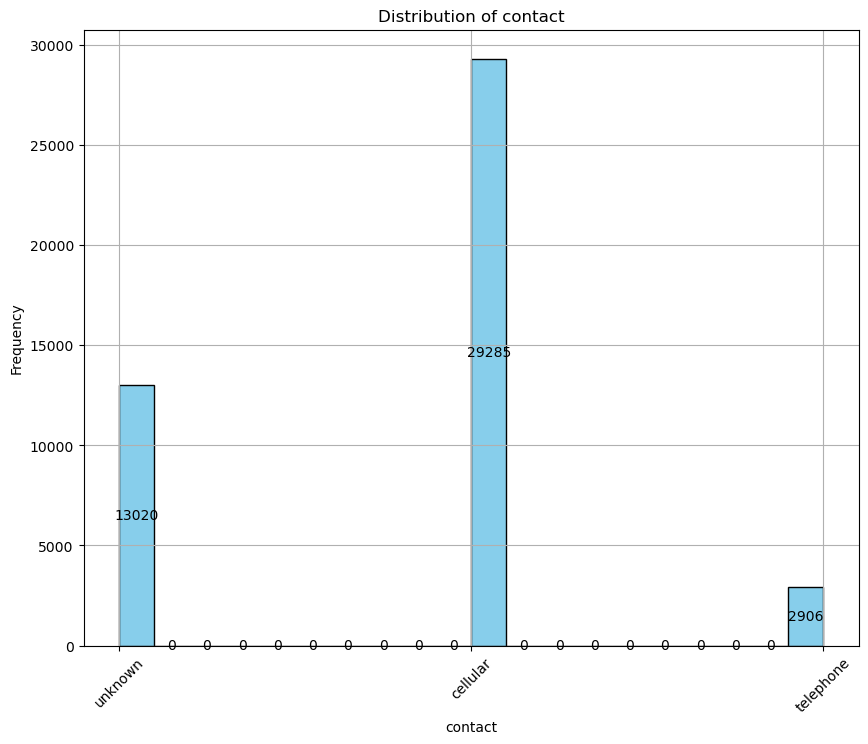

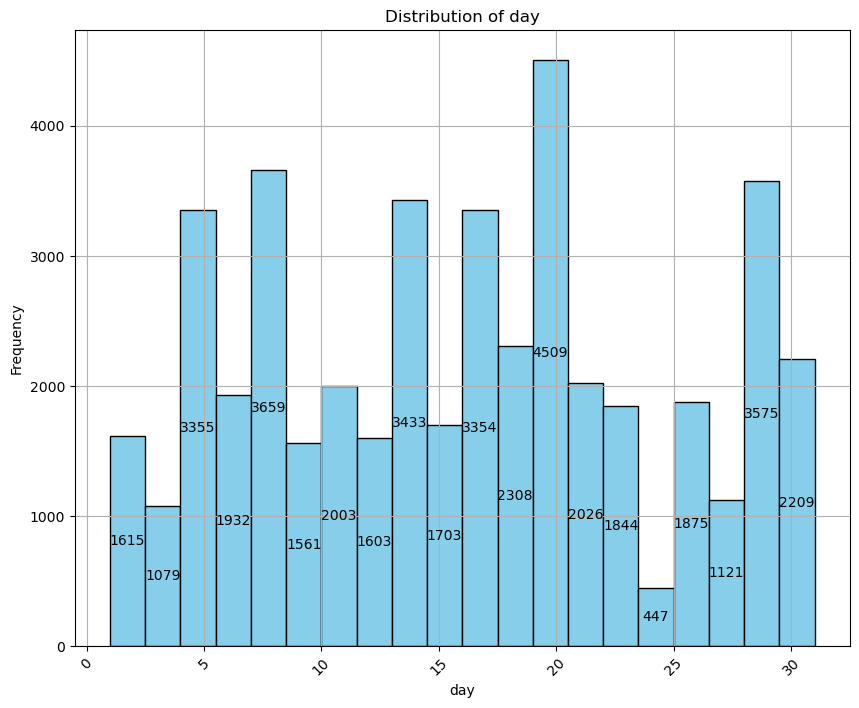

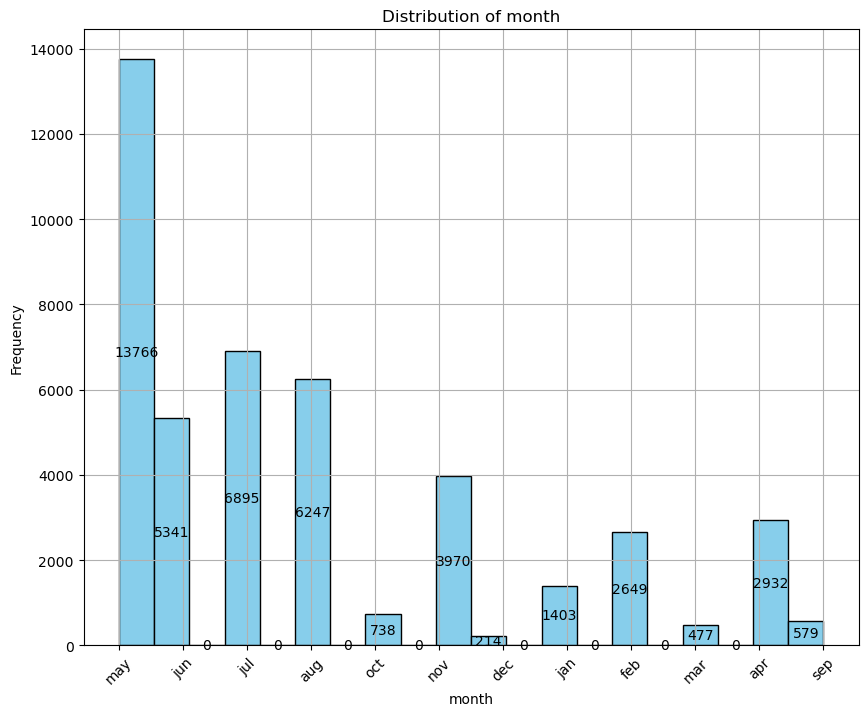

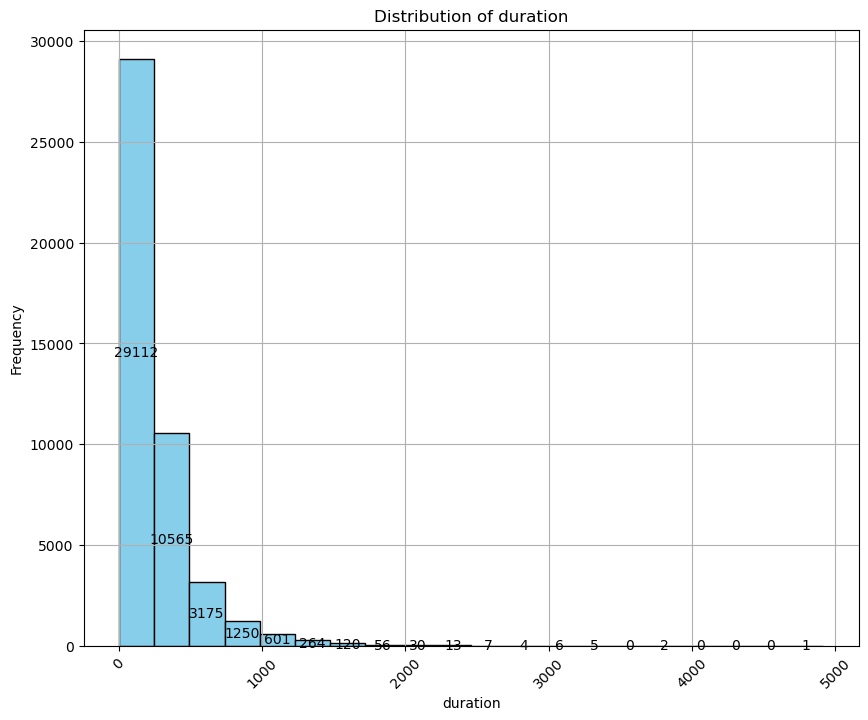

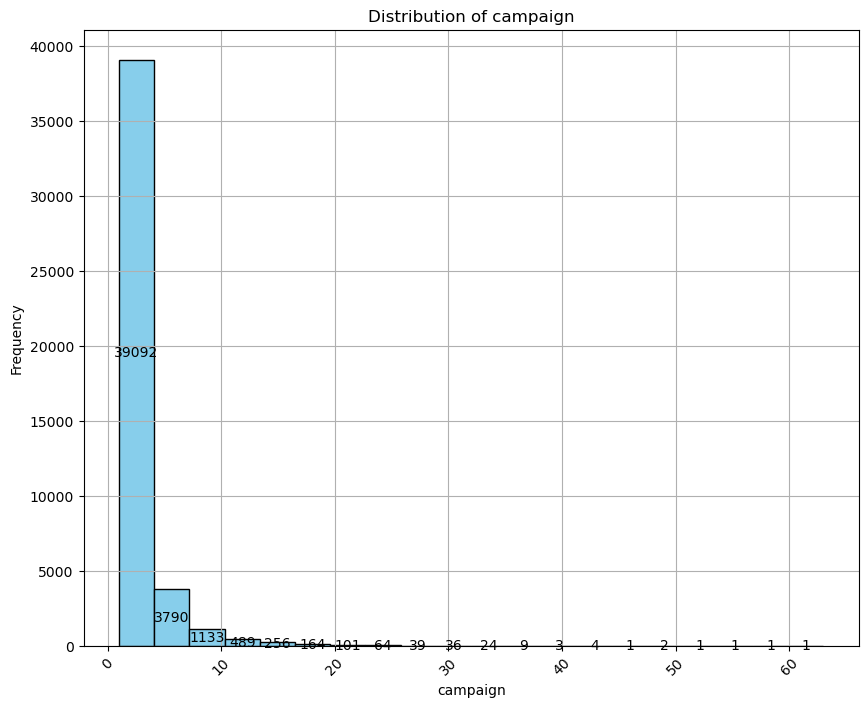

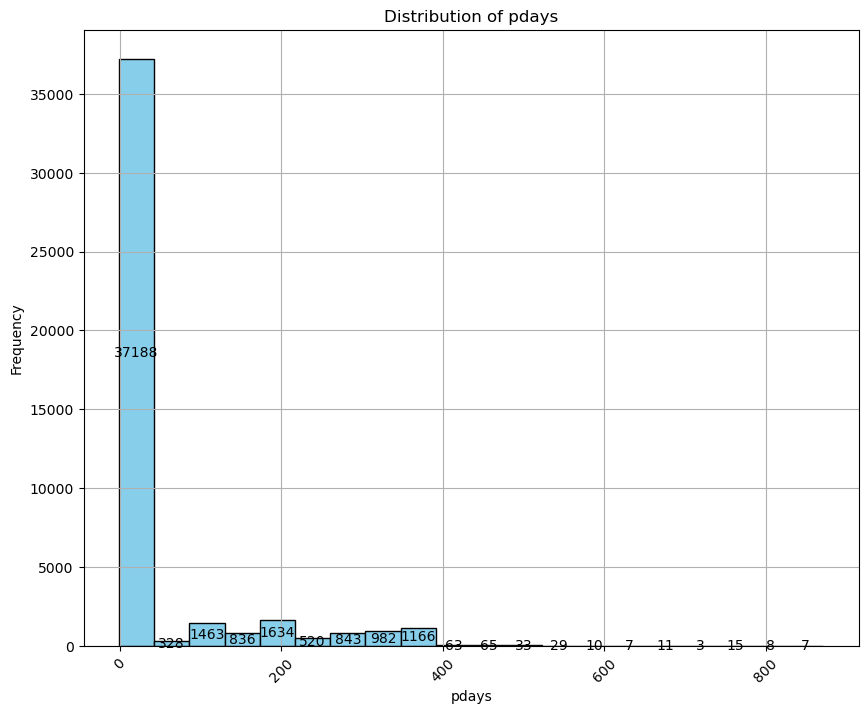

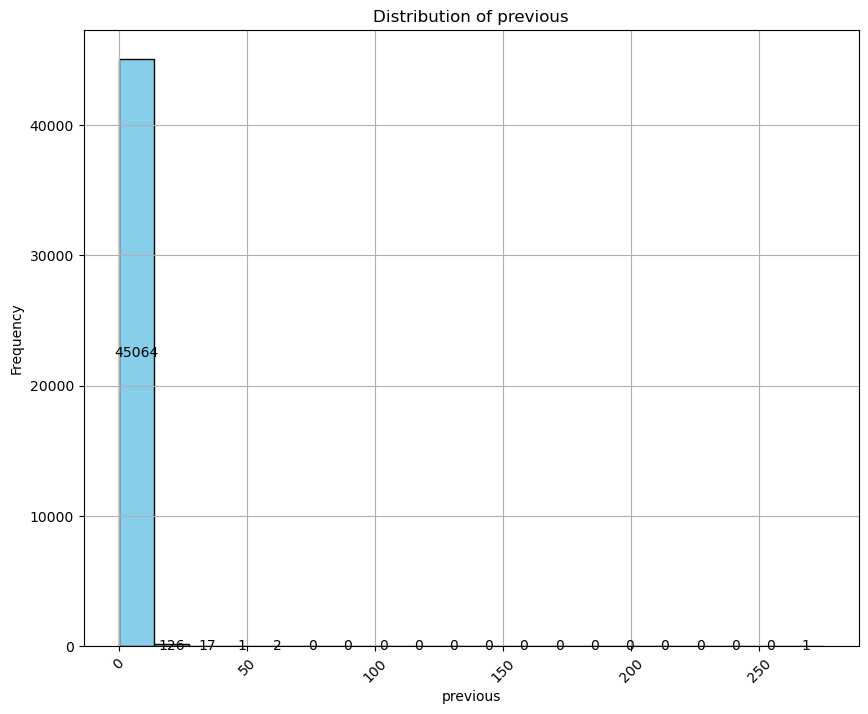

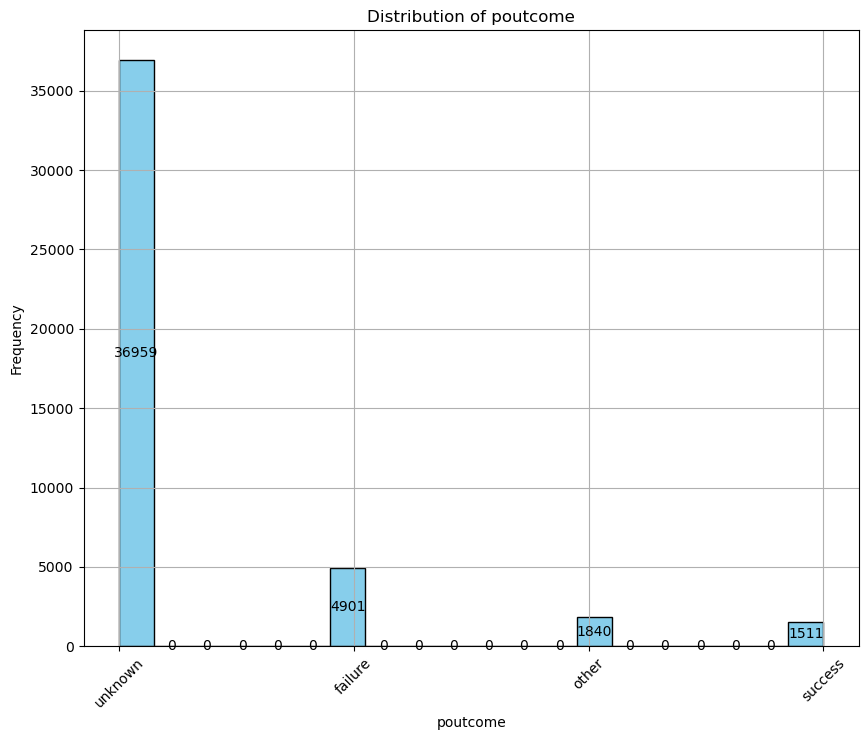

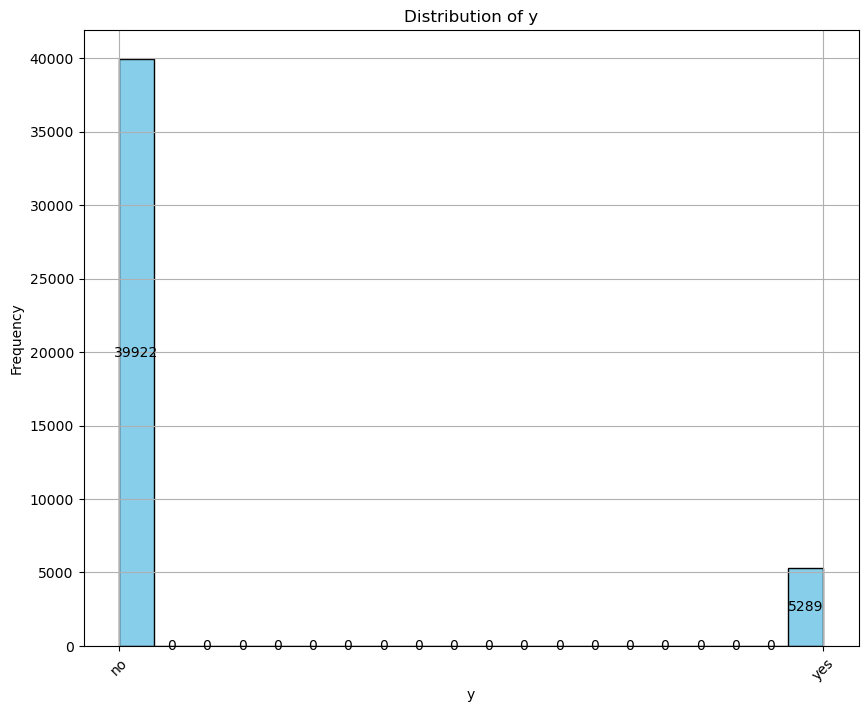

In [10]:
for column in data.columns:
    plt.figure(figsize=(10, 8))
    
    counts, bins, _ = plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    # Add count inside the center of each bar
    for count, bin in zip(counts, bins):
        plt.text(bin + (bins[1] - bins[0]) / 2, count / 2, str(int(count)),
                 ha='center', va='center', color='black')
    # Set title and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    plt.show()

### Finding Outliers using BoxPlot

<Axes: >

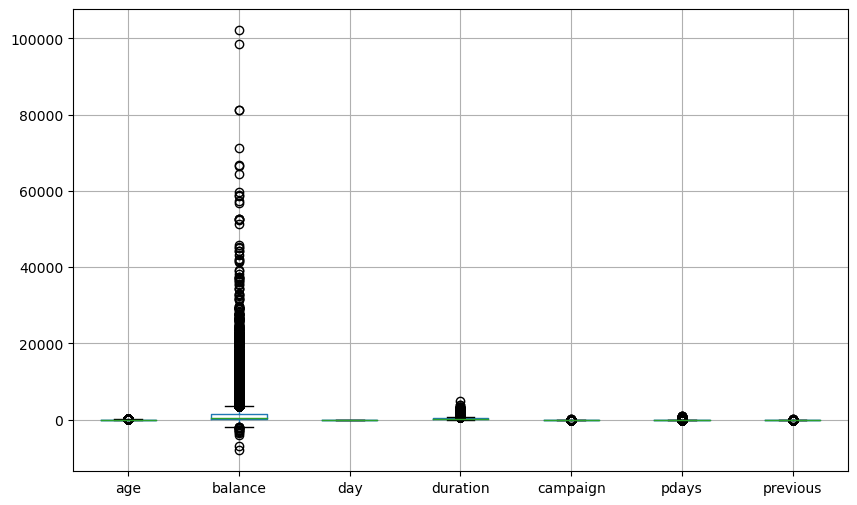

In [11]:
data.boxplot(figsize=(10,6))

# Data PreProcessing

### Handling Outliers

In [12]:
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['balance'] < lower_bound) | (data['balance'] > upper_bound)]

data = data[(data['balance'] >= lower_bound) & (data['balance'] <= upper_bound)]

### Data Encoding

In [13]:
data_encoded = pd.get_dummies(data, columns=['job', 'marital',  'contact', 'default', 'housing', 'loan','poutcome'])

In [14]:
from sklearn.preprocessing import LabelEncoder
data_encoded['y'] = LabelEncoder().fit_transform(data_encoded['y'])
data_encoded['month'] = LabelEncoder().fit_transform(data_encoded['month'])
data_encoded['education'] = LabelEncoder().fit_transform(data_encoded['education'])

In [15]:
pd.set_option('display.max_columns', None)
data_encoded

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,8,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,False,False,True
1,44,1,29,5,8,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,True,False,False,False,False,True
2,33,1,2,5,8,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False,True
3,47,3,1506,5,8,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,False,False,True
4,33,3,1,5,8,198,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,1,505,17,9,386,2,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,False,True,False,False,False,True
45206,51,2,825,17,9,977,3,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True
45207,71,0,1729,17,9,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False,False,False,False,True
45209,57,1,668,17,9,508,4,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,False,False,False,True


# Separate Training and Testing Data

In [16]:
from sklearn.model_selection import train_test_split
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# The Dataset is imbalanced, so we will use the SMOTE Technique to deal with class imbalance

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [18]:
resampled_data = pd.concat([X_resampled, pd.Series(y_resampled, name='y')], axis=1)

In [19]:
X_resampled = resampled_data.drop('y', axis=1)
y_resampled = resampled_data['y']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# ML Modelling

## In Each ML Model we will Focus on "PRECISION", "RECALL" and "F1-SCORE" instead of "Accuracy" (Due to class imbalane)

## 1) Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.8768465592754806

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6745
           1       0.87      0.88      0.88      6726

    accuracy                           0.88     13471
   macro avg       0.88      0.88      0.88     13471
weighted avg       0.88      0.88      0.88     13471


Confusion Matrix for Test Set:
[[5883  862]
 [ 797 5929]]


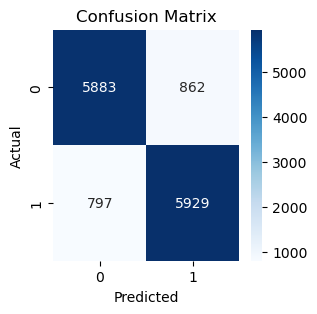

In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2)Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
DecT = DecisionTreeClassifier(random_state=42)
DecT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy on Test Set: 0.9230940538935491

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6745
           1       0.92      0.93      0.92      6726

    accuracy                           0.92     13471
   macro avg       0.92      0.92      0.92     13471
weighted avg       0.92      0.92      0.92     13471


Confusion Matrix for Test Set:
[[6175  570]
 [ 466 6260]]


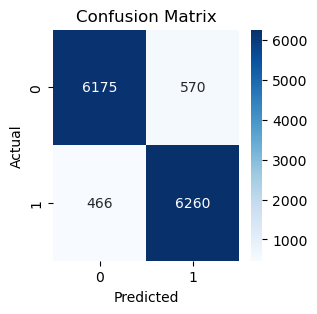

In [23]:
y_pred =   DecT.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", test_accuracy)

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3)Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
RndF = RandomForestClassifier(n_estimators=300 , criterion='entropy' ,max_depth=None ,random_state=42)

RndF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=42)

Accuracy: 0.9487788582881745

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6745
           1       0.96      0.94      0.95      6726

    accuracy                           0.95     13471
   macro avg       0.95      0.95      0.95     13471
weighted avg       0.95      0.95      0.95     13471


Confusion Matrix for Test Set:
[[6454  291]
 [ 399 6327]]


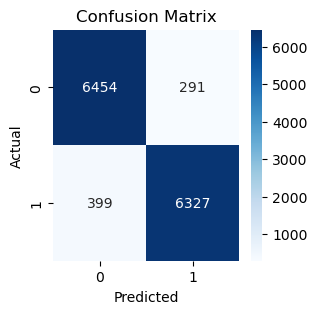

In [25]:
y_pred = RndF.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
"""
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid_search = GridSearchCV(RndF, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params
"""

"\nfrom sklearn.model_selection import GridSearchCV\n\n# Define hyperparameter grid for tuning\nparam_grid = {\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'criterion': ['gini', 'entropy']\n}\n\n# Perform grid search\ngrid_search = GridSearchCV(RndF, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Get the best hyperparameters\nbest_params = grid_search.best_params_\nbest_params\n"

# 4)KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_test,y_test)

KNeighborsClassifier()

In [28]:
print("accuracy = ", knn.score(X_test,y_test))

accuracy =  0.8792962660530027


In [29]:
knn_pred = knn.predict(X_test)
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5941
           1       0.94      0.84      0.89      7530

    accuracy                           0.88     13471
   macro avg       0.88      0.88      0.88     13471
weighted avg       0.89      0.88      0.88     13471



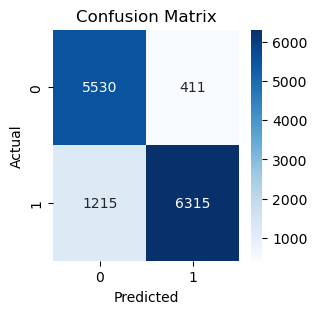

In [30]:
conf_matrix = confusion_matrix(knn_pred, y_test)

plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Let's Use Cross Validation on our KNN Algorithm

In [31]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X, y, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

knn.fit(X, y)
knn_pred = knn.predict(X_test)

print("\nClassification Report:")
print(classification_report(knn_pred, y_test))

Cross-Validation Scores: [0.89786341 0.88971224 0.89130435 0.85647233 0.84547925]
Mean CV Accuracy: 0.8761663148308967

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.64      0.77     10290
           1       0.45      0.95      0.61      3181

    accuracy                           0.71     13471
   macro avg       0.71      0.80      0.69     13471
weighted avg       0.85      0.71      0.74     13471



# 5)Bagging Classifier

In [32]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(n_estimators= 50)
bagg.fit(X_test,y_test)

BaggingClassifier(n_estimators=50)

In [33]:
train_score = bagg.score(X_train, y_train)
print("Training Accuracy:", train_score)

Training Accuracy: 0.9278450003711677


In [34]:
bagg_score = bagg.score(X_test,y_test)
print("accuarcy = ", bagg_score)

accuarcy =  0.9999257664612872


In [35]:
bagg_pred = bagg.predict(X_test)
print(classification_report(bagg_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6746
           1       1.00      1.00      1.00      6725

    accuracy                           1.00     13471
   macro avg       1.00      1.00      1.00     13471
weighted avg       1.00      1.00      1.00     13471



[[6745    0]
 [   1 6725]]


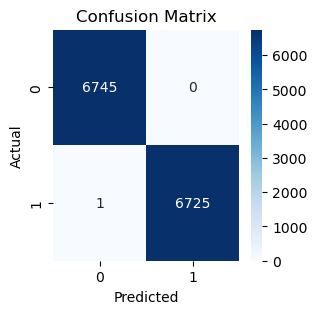

In [36]:
print(confusion_matrix(y_test, bagg_pred))

plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, bagg_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Out of all 5 Models , Bagging Classifier gives best result!!!